<a href="https://colab.research.google.com/github/PranavReddyy/MLProject/blob/main/p2_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering techniques evaluation

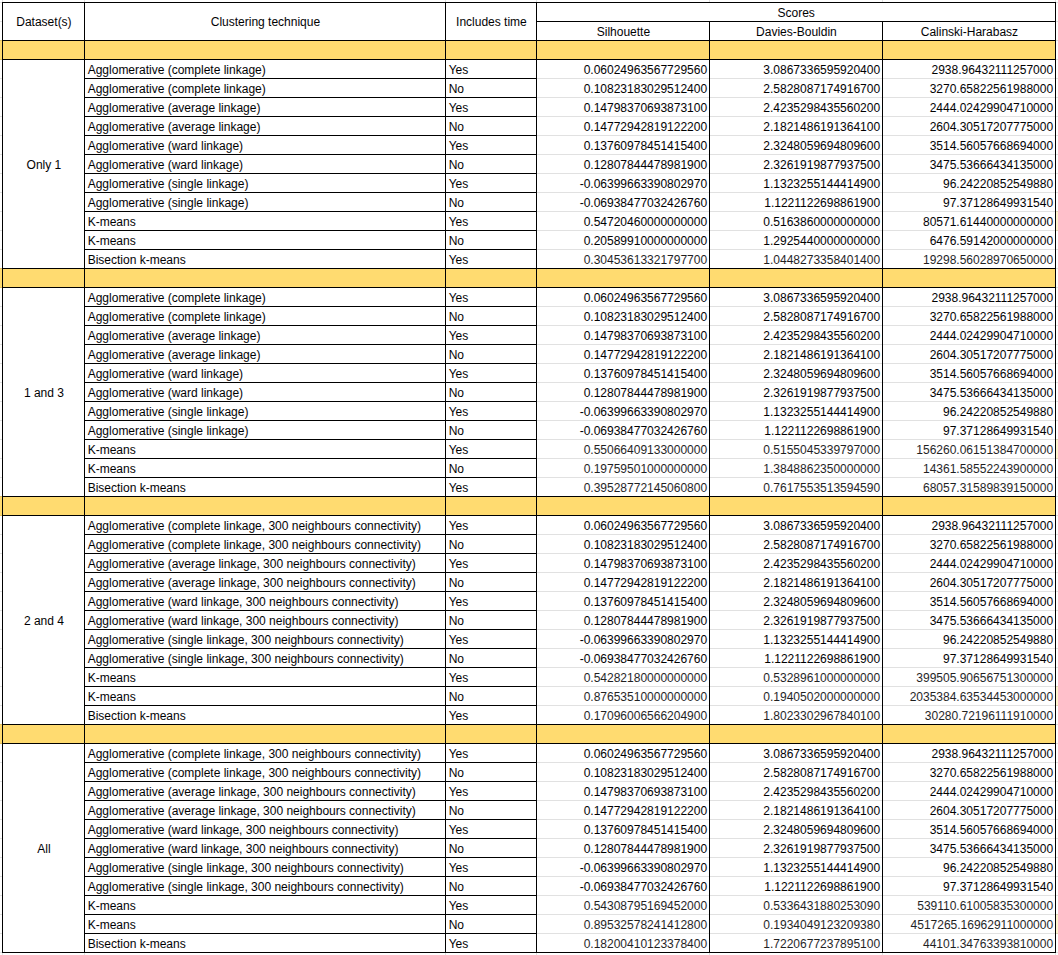

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1_cluster_T = pd.read_pickle('/content/drive/MyDrive/MU 2-2 ML Project 2025/fileshare/df_cluster_T.pkl')
df13_cluster_T = pd.read_pickle('/content/drive/MyDrive/MU 2-2 ML Project 2025/fileshare/df13_cluster_T.pkl')
df24_cluster_T = pd.read_pickle('/content/drive/MyDrive/MU 2-2 ML Project 2025/fileshare/df24_cluster_T.pkl')
df_all_cluster_T = pd.read_pickle('/content/drive/MyDrive/MU 2-2 ML Project 2025/fileshare/df_all_cluster_T.pkl')

## *DATA SET 1*

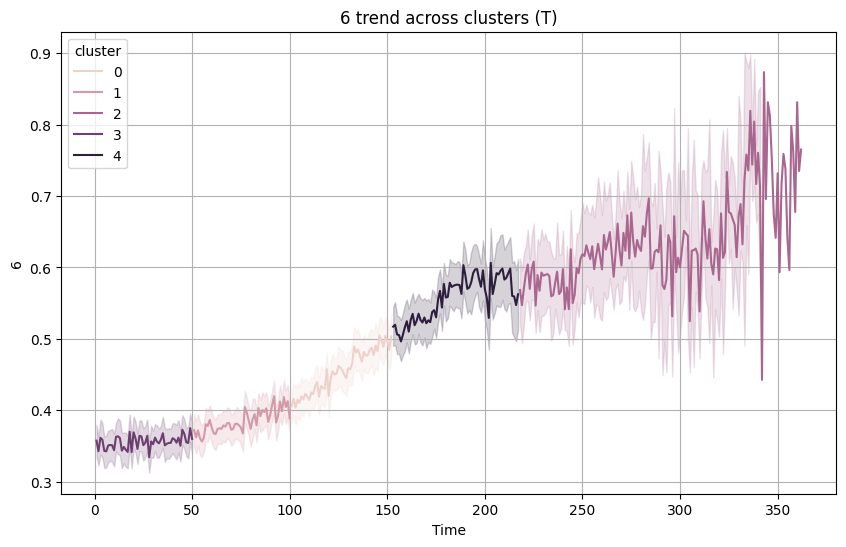

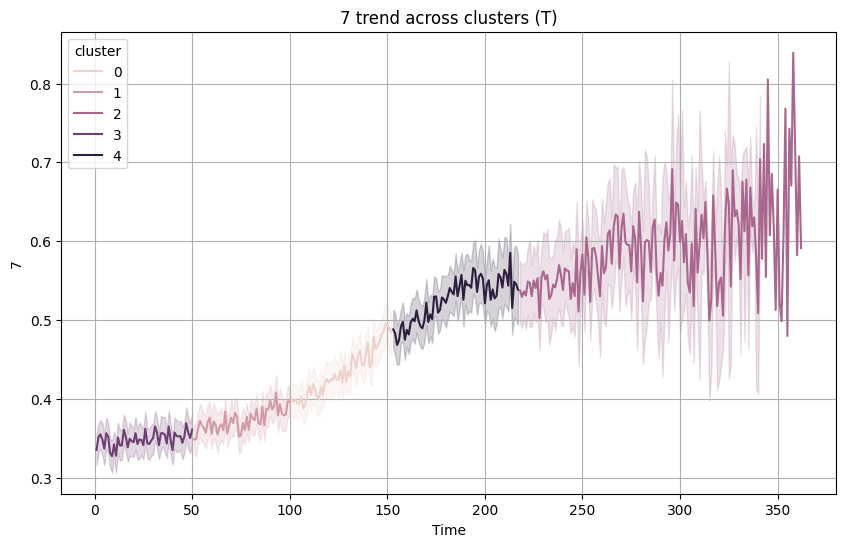

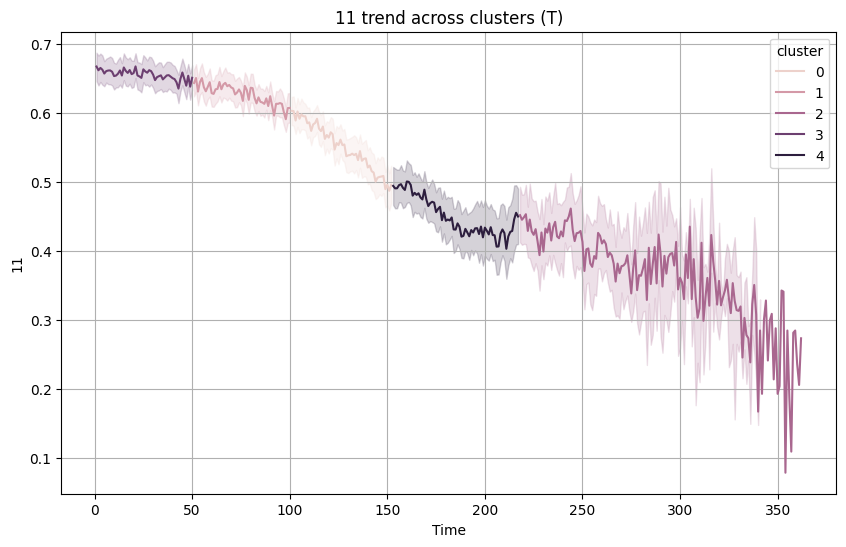

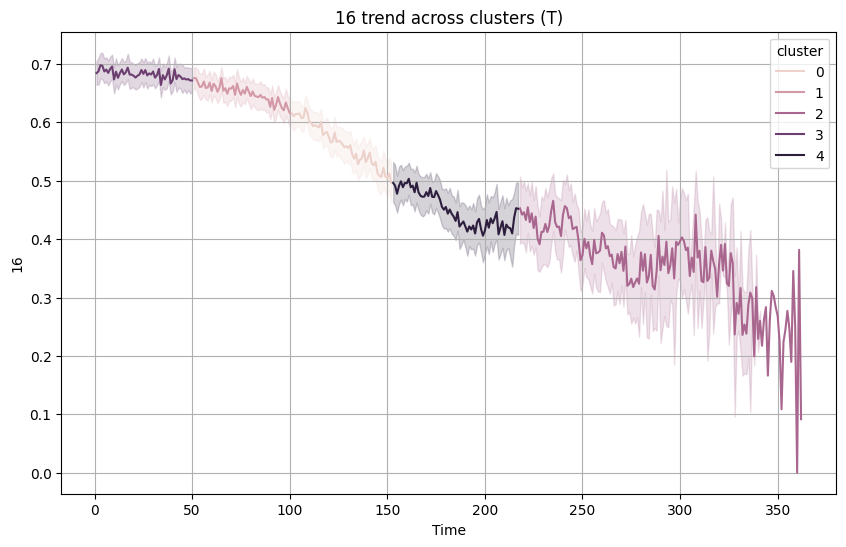

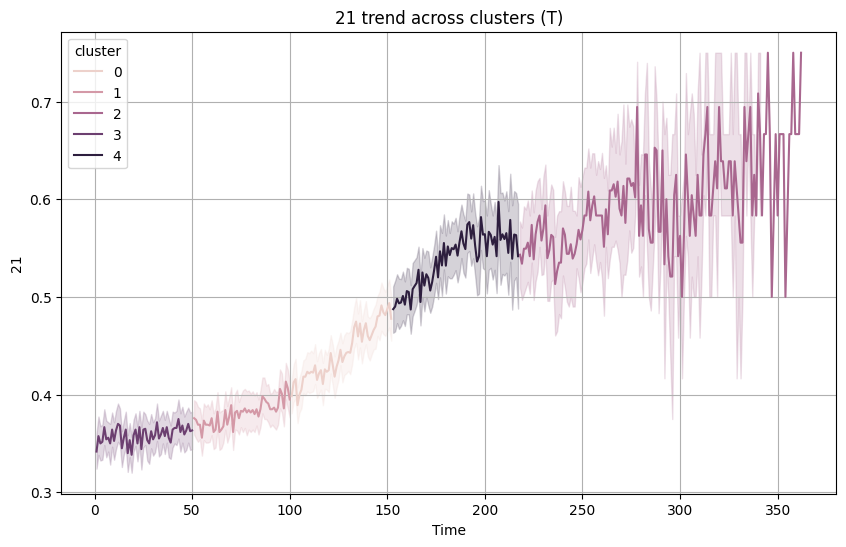

In [ ]:
sensors = [6, 7, 11, 16, 21]
for sensor in sensors:
  plt.figure(figsize=(10, 6))
  #it takes all the points from cluster "k", finds the mean value of sensor "s" at time "t" and maps it. it does this for all t values in cluster
  #the translucent region is the confidence interval for mean
  sns.lineplot(data=df1_cluster_T, x=1, y=sensor, hue='cluster')
  plt.title(f'{sensor} trend across clusters (T)')
  plt.xlabel("Time")
  plt.grid(True)
  plt.show()
  '''
  CLUSTER STAGE
    0      2
    1      1
    2      4
    3      0
    4      3
  '''

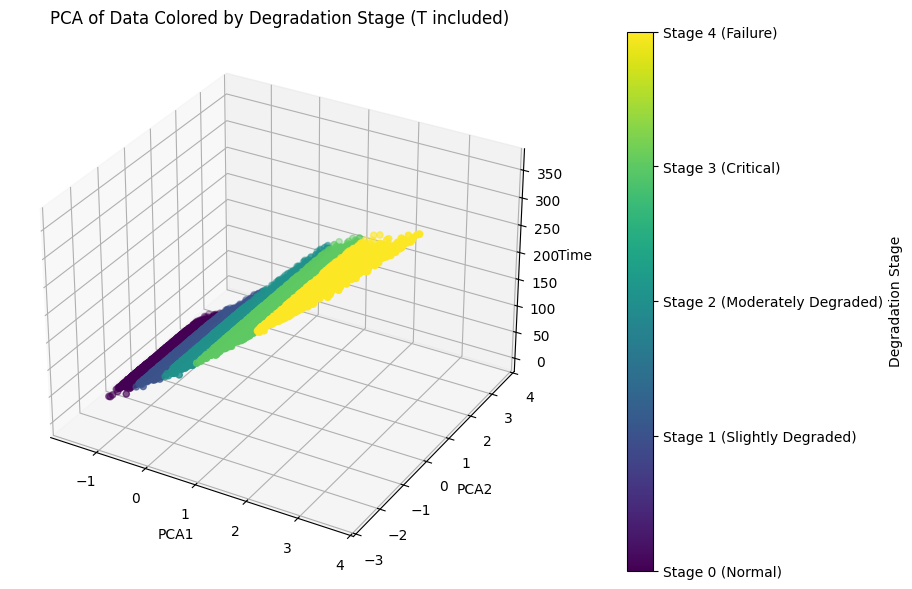

In [ ]:
sensor_cols_T = [col for col in df1_cluster_T.columns if col not in [0,'cluster']]
X_T = df1_cluster_T[sensor_cols_T].values
pcat = sk.decomposition.PCA(n_components=2)
X_pca_T = pcat.fit_transform(X_T)


df1_pca_T= df1_cluster_T.copy()
df1_pca_T['PCA1'] = X_pca_T[:, 0]
df1_pca_T['PCA2'] = X_pca_T[:, 1]

# Adjusting cluster names to be assoicated with stages of degradation
cluster_to_stage_T = {
    0: 2,
    1: 1,
    2: 4,
    3: 0,
    4: 3
}
stage_names = {
    0: "Stage 0 (Normal)",
    1: "Stage 1 (Slightly Degraded)",
    2: "Stage 2 (Moderately Degraded)",
    3: "Stage 3 (Critical)",
    4: "Stage 4 (Failure)"
}

# creating a column that associates each sample with its stage
df1_pca_T['stage'] = df1_pca_T['cluster'].map(cluster_to_stage_T)

#plotting
df1_plot_T = df1_pca_T.copy()
scaler = sk.preprocessing.StandardScaler()
df1_plot_T[['PCA1', 'PCA2']] = scaler.fit_transform(df1_plot_T[['PCA1', 'PCA2']])
fig= plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df1_plot_T['PCA1'], df1_plot_T['PCA2'], df1_plot_T[1], c=df1_plot_T['stage'], cmap='viridis', marker='o')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('Time')
ax.set_title("PCA of Data Colored by Degradation Stage (T included)")
# adding a colorbar with the stage names
cbar = fig.colorbar(scatter, ax=ax, pad=0.1, ticks=range(5))
cbar.ax.set_yticklabels([stage_names[i] for i in range(5)])
cbar.set_label("Degradation Stage")
plt.show()

## *DATA SET 1 AND 3*

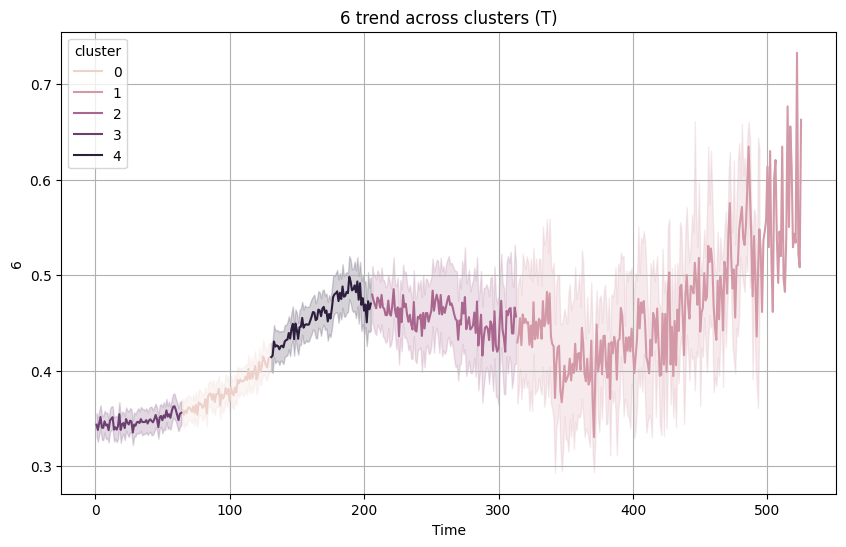

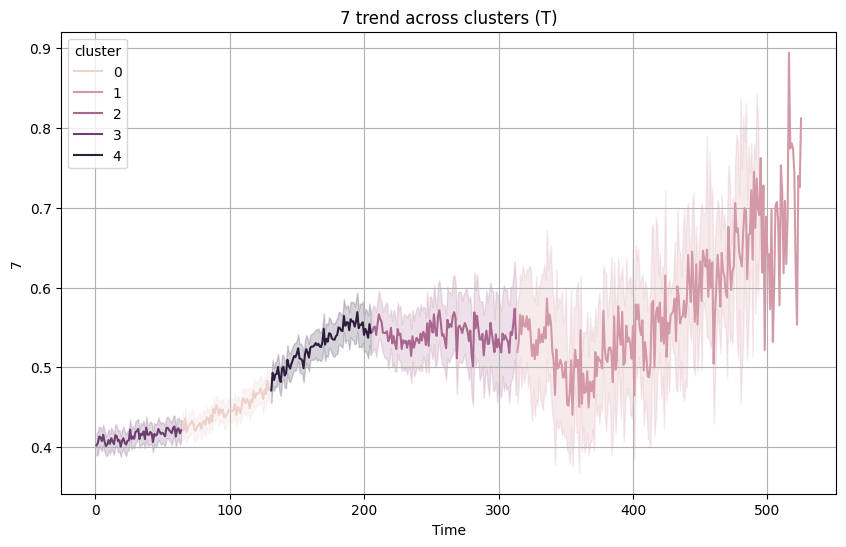

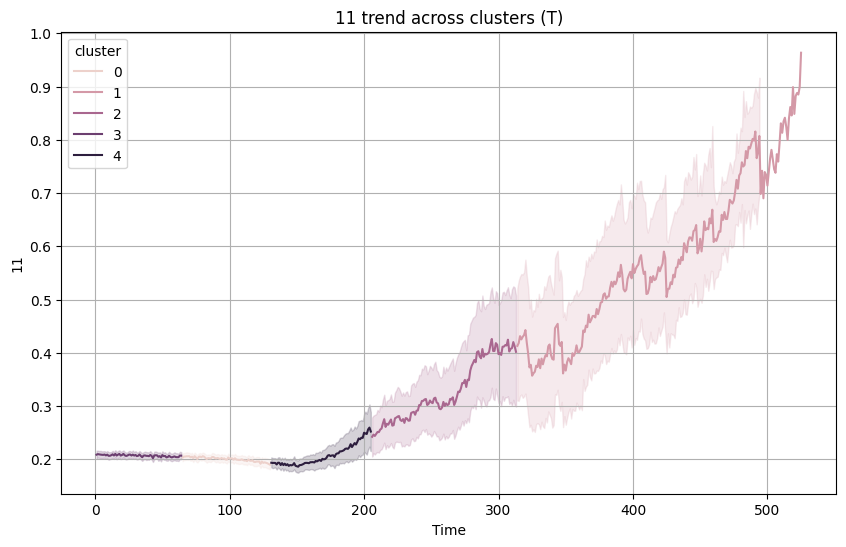

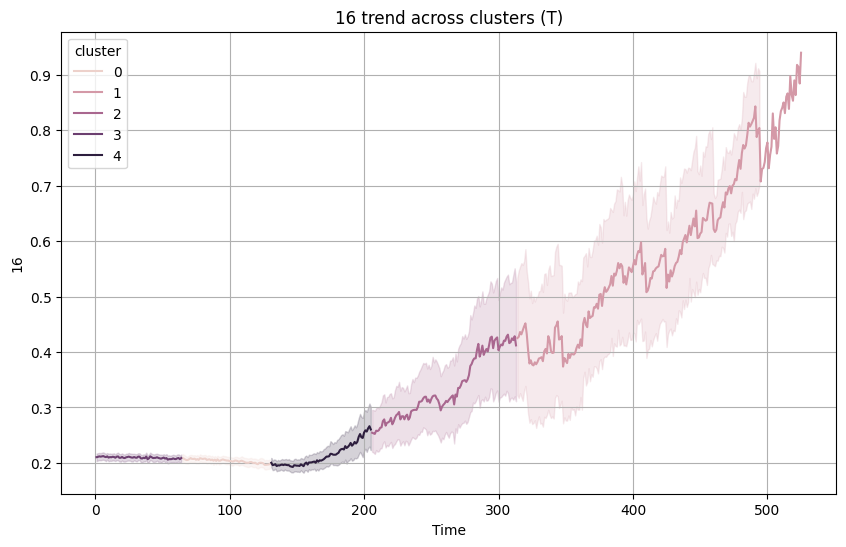

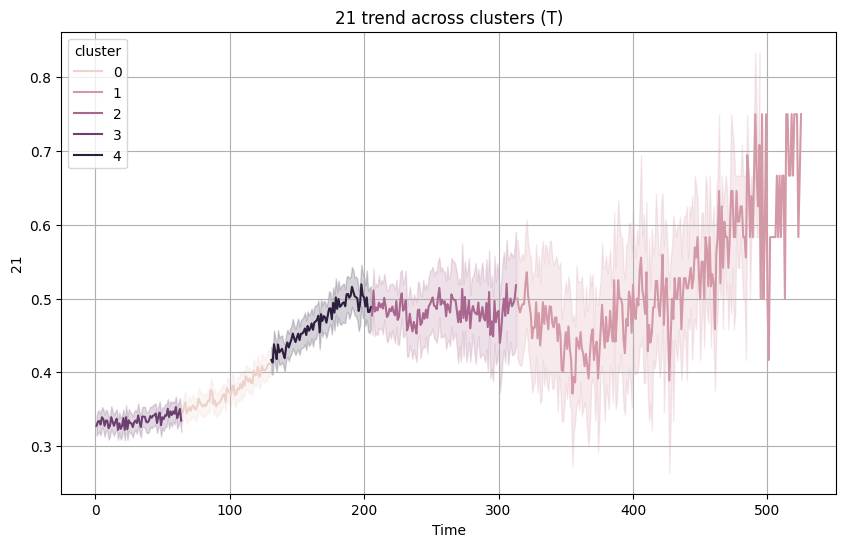

In [ ]:
sensors = [6, 7, 11, 16, 21]
for sensor in sensors:
  plt.figure(figsize=(10, 6))
  sns.lineplot(data=df13_cluster_T, x=1, y=sensor, hue='cluster')
  plt.title(f'{sensor} trend across clusters (T)')
  plt.xlabel("Time")
  plt.grid(True)
  plt.show()
  '''
  CLUSTER STAGE
    0     1
    1     4
    2     3
    3     0
    4     2
  '''

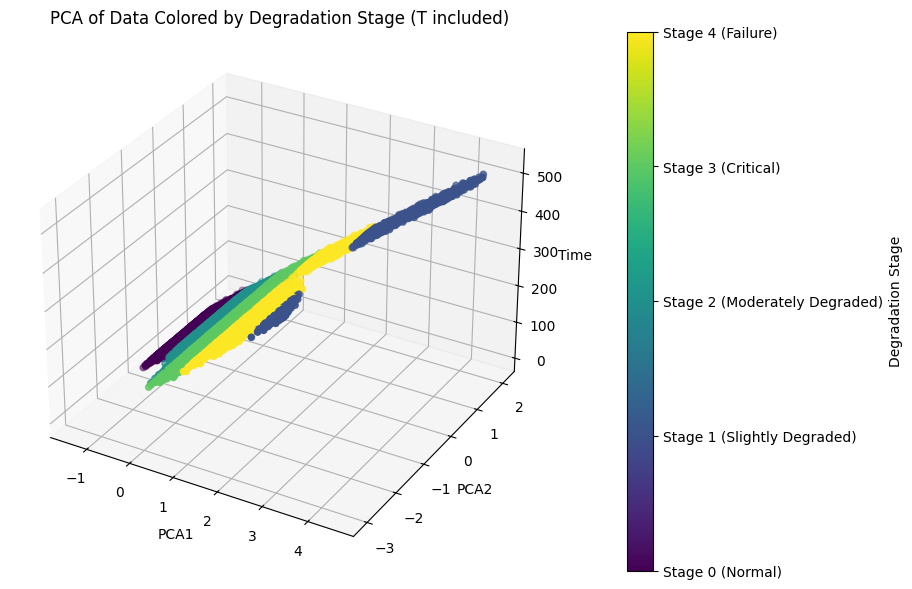

In [ ]:
sensor_cols_T13 = [col for col in df13_cluster_T.columns if col not in [0,'cluster']]
X_T13 = df13_cluster_T[sensor_cols_T13].values
pcat = sk.decomposition.PCA(n_components=2)
X_pca_T13 = pcat.fit_transform(X_T13)


df13_pca_T= df13_cluster_T.copy()
df13_pca_T['PCA1'] = X_pca_T13[:, 0]
df13_pca_T['PCA2'] = X_pca_T13[:, 1]

# Adjusting cluster names to be assoicated with stages of degradation
cluster_to_stage_T = {
    0: 2,
    1: 1,
    2: 4,
    3: 0,
    4: 3
}
stage_names = {
    0: "Stage 0 (Normal)",
    1: "Stage 1 (Slightly Degraded)",
    2: "Stage 2 (Moderately Degraded)",
    3: "Stage 3 (Critical)",
    4: "Stage 4 (Failure)"
}

# creating a column that associates each sample with its stage
df13_pca_T['stage'] = df13_pca_T['cluster'].map(cluster_to_stage_T)

#plotting
df13_plot_T = df13_pca_T.copy()
scaler = sk.preprocessing.StandardScaler()
df13_plot_T[['PCA1', 'PCA2']] = scaler.fit_transform(df13_plot_T[['PCA1', 'PCA2']])
fig= plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df13_plot_T['PCA1'], df13_plot_T['PCA2'], df13_plot_T[1], c=df13_plot_T['stage'], cmap='viridis', marker='o')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('Time')
ax.set_title("PCA of Data Colored by Degradation Stage (T included)")
# adding a colorbar with the stage names
cbar = fig.colorbar(scatter, ax=ax, pad=0.1, ticks=range(5))
cbar.ax.set_yticklabels([stage_names[i] for i in range(5)])
cbar.set_label("Degradation Stage")
plt.show()

## *DATASETS 2 AND 4*

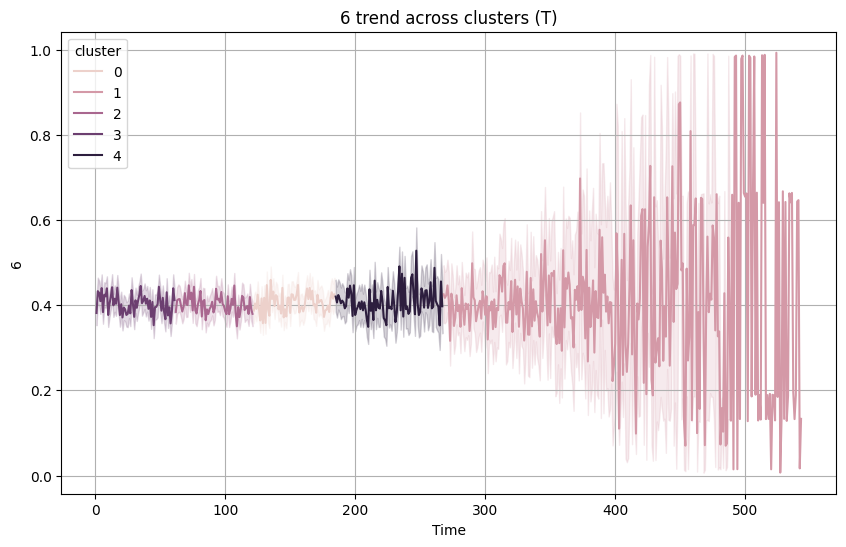

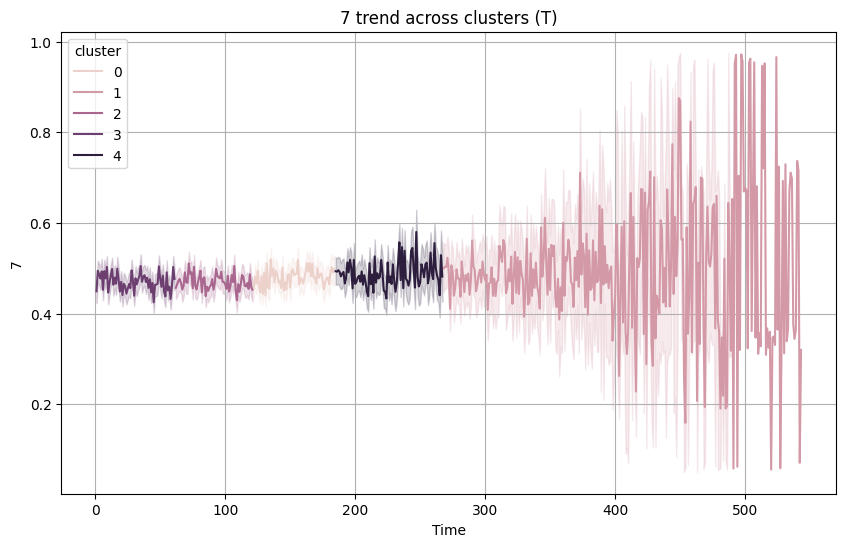

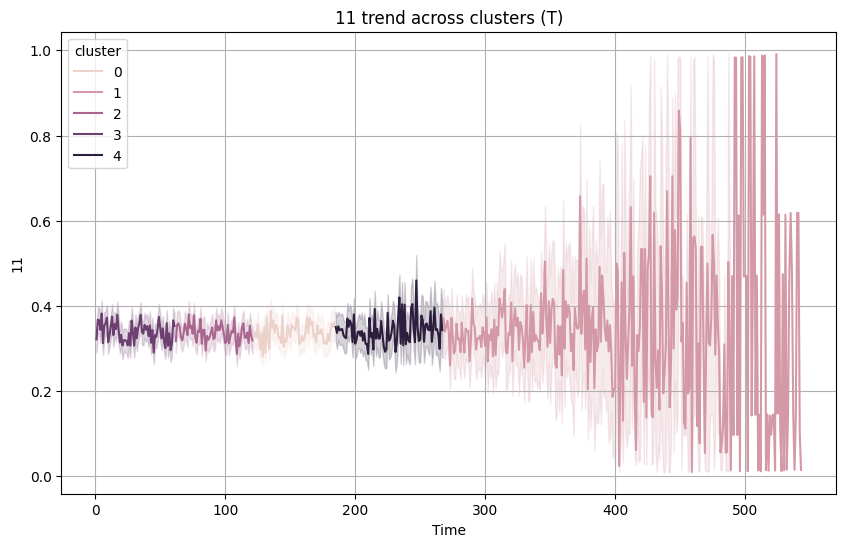

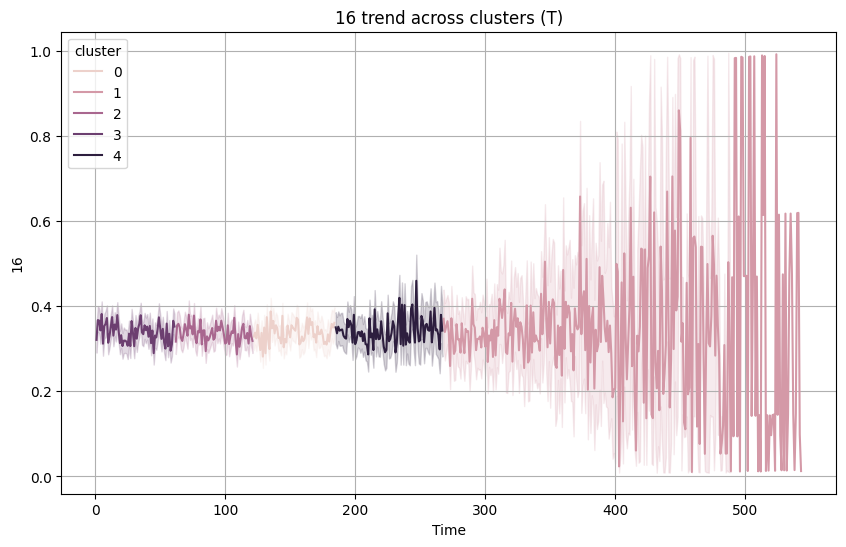

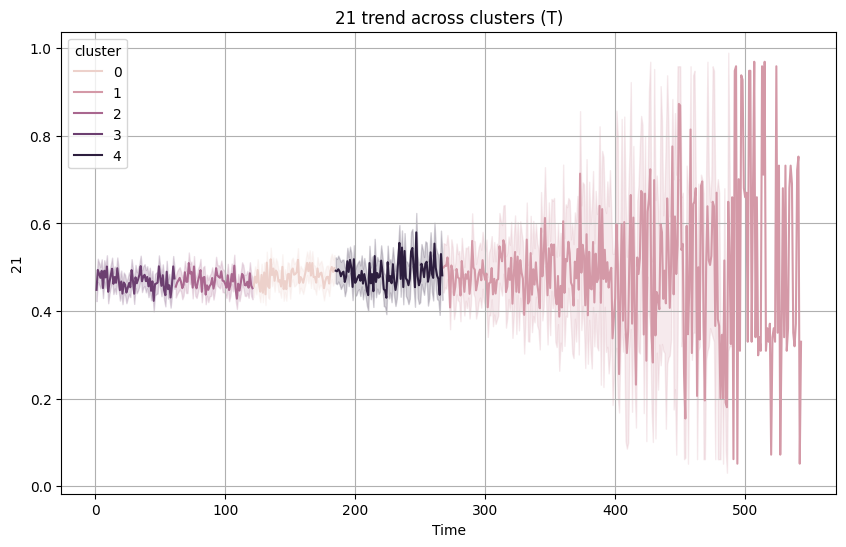

In [ ]:
sensors = [6, 7, 11, 16, 21]
for sensor in sensors:
  plt.figure(figsize=(10, 6))
  sns.lineplot(data=df24_cluster_T, x=1, y=sensor, hue='cluster')
  plt.title(f'{sensor} trend across clusters (T)')
  plt.xlabel("Time")
  plt.grid(True)
  plt.show()
  '''
  CLUSTER STAGE
    0     2
    1     4
    2     1
    3     0
    4     3
  '''

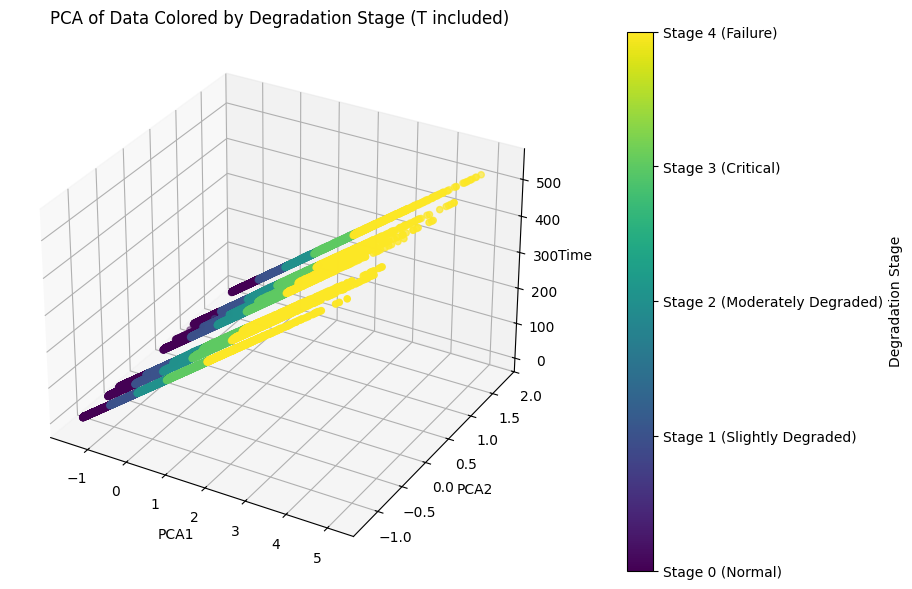

In [ ]:
sensor_cols_T24 = [col for col in df24_cluster_T.columns if col not in [0,'cluster']]
X_T24 = df24_cluster_T[sensor_cols_T24].values
pcat = sk.decomposition.PCA(n_components=2)
X_pca_T24 = pcat.fit_transform(X_T24)


df24_pca_T= df24_cluster_T.copy()
df24_pca_T['PCA1'] = X_pca_T24[:, 0]
df24_pca_T['PCA2'] = X_pca_T24[:, 1]

# Adjusting cluster names to be assoicated with stages of degradation
cluster_to_stage_T = {
    0: 2,
    1: 4,
    2: 1,
    3: 0,
    4: 3
}
stage_names = {
    0: "Stage 0 (Normal)",
    1: "Stage 1 (Slightly Degraded)",
    2: "Stage 2 (Moderately Degraded)",
    3: "Stage 3 (Critical)",
    4: "Stage 4 (Failure)"
}

# creating a column that associates each sample with its stage
df24_pca_T['stage'] = df24_pca_T['cluster'].map(cluster_to_stage_T)

#plotting
df24_plot_T = df24_pca_T.copy()
scaler = sk.preprocessing.StandardScaler()
df24_plot_T[['PCA1', 'PCA2']] = scaler.fit_transform(df24_plot_T[['PCA1', 'PCA2']])
fig= plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df24_plot_T['PCA1'], df24_plot_T['PCA2'], df24_plot_T[1], c=df24_plot_T['stage'], cmap='viridis', marker='o')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('Time')
ax.set_title("PCA of Data Colored by Degradation Stage (T included)")
# adding a colorbar with the stage names
cbar = fig.colorbar(scatter, ax=ax, pad=0.1, ticks=range(5))
cbar.ax.set_yticklabels([stage_names[i] for i in range(5)])
cbar.set_label("Degradation Stage")
plt.show()

## *DATASET ALL*

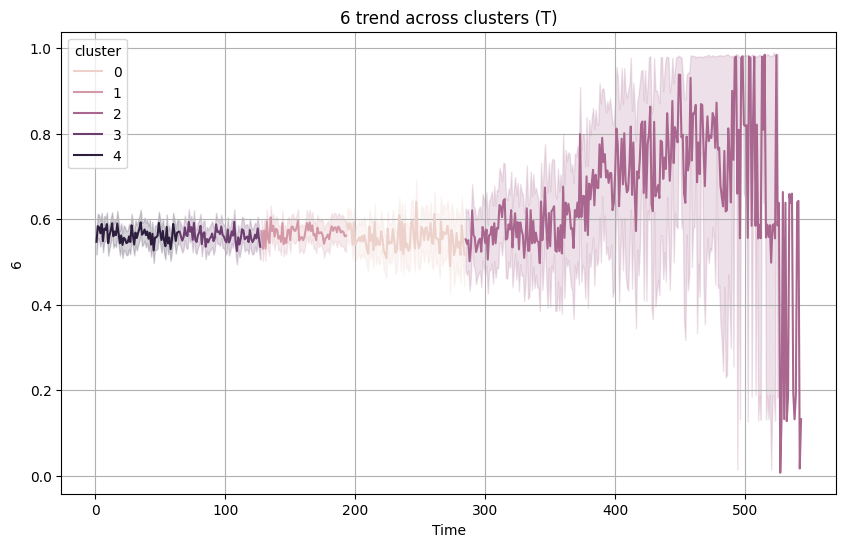

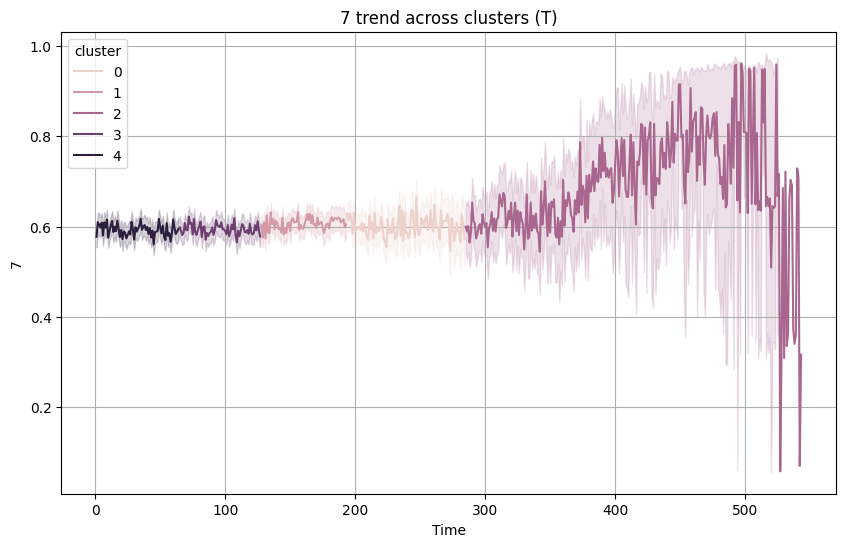

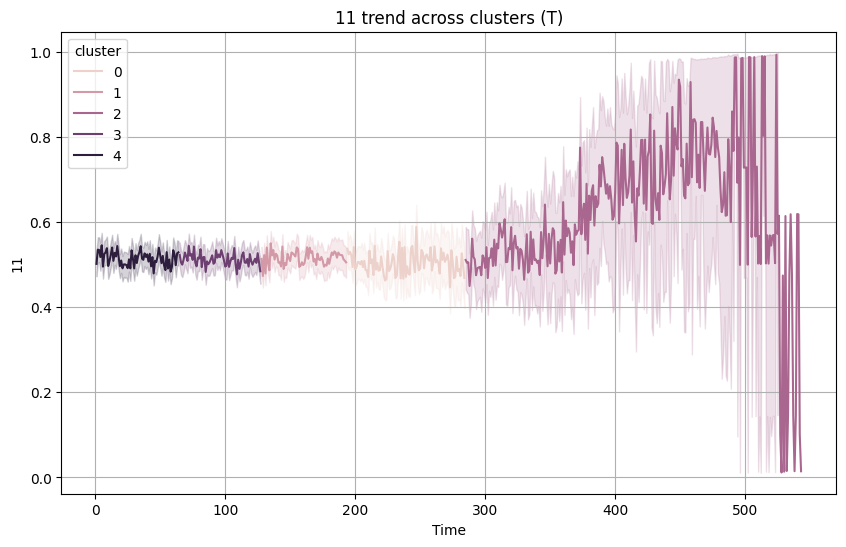

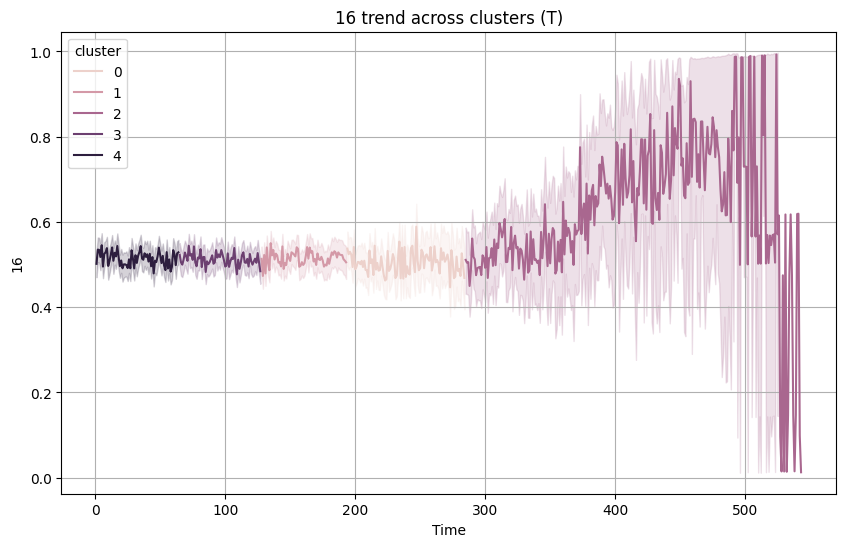

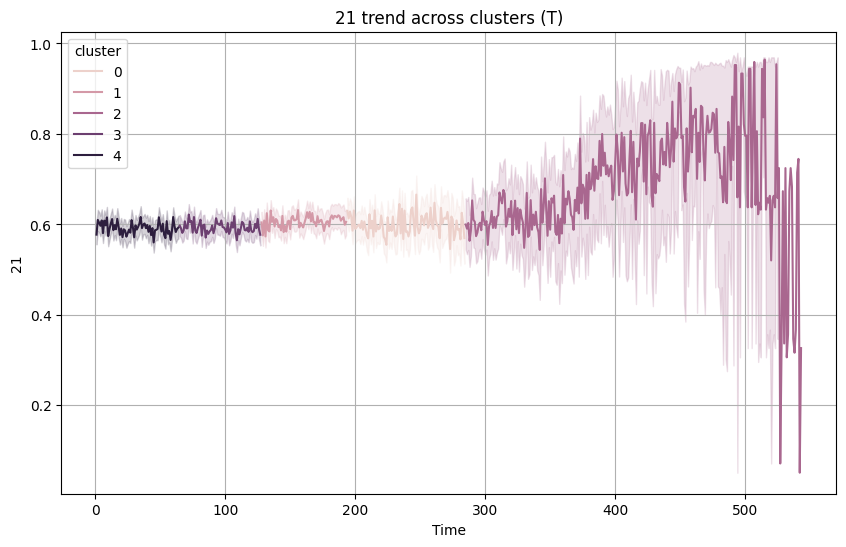

In [ ]:
sensors = [6, 7, 11, 16, 21]
for sensor in sensors:
  plt.figure(figsize=(10, 6))
  sns.lineplot(data=df_all_cluster_T, x=1, y=sensor, hue='cluster')
  plt.title(f'{sensor} trend across clusters (T)')
  plt.xlabel("Time")
  plt.grid(True)
  plt.show()
  '''
  CLUSTER STAGE
    0     3
    1     2
    2     4
    3     1
    4     0
  '''

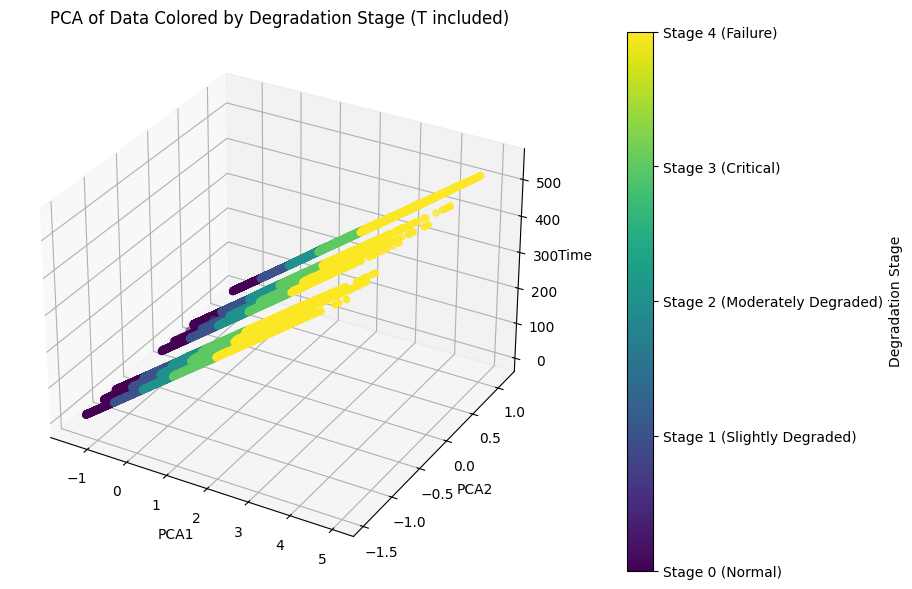

In [ ]:
sensor_cols_T_all = [col for col in df_all_cluster_T.columns if col not in [0,'cluster']]
X_T_all = df_all_cluster_T[sensor_cols_T_all].values
pcat = sk.decomposition.PCA(n_components=2)
X_pca_T_all = pcat.fit_transform(X_T_all)


df_all_pca_T= df_all_cluster_T.copy()
df_all_pca_T['PCA1'] = X_pca_T_all[:, 0]
df_all_pca_T['PCA2'] = X_pca_T_all[:, 1]

# Adjusting cluster names to be assoicated with stages of degradation
cluster_to_stage_T = {
    0: 3,
    1: 2,
    2: 4,
    3: 1,
    4: 0
}
stage_names = {
    0: "Stage 0 (Normal)",
    1: "Stage 1 (Slightly Degraded)",
    2: "Stage 2 (Moderately Degraded)",
    3: "Stage 3 (Critical)",
    4: "Stage 4 (Failure)"
}

# creating a column that associates each sample with its stage
df_all_pca_T['stage'] = df_all_pca_T['cluster'].map(cluster_to_stage_T)

#plotting
df_all_plot_T = df_all_pca_T.copy()
scaler = sk.preprocessing.StandardScaler()
df_all_plot_T[['PCA1', 'PCA2']] = scaler.fit_transform(df_all_plot_T[['PCA1', 'PCA2']])
fig= plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_all_plot_T['PCA1'], df_all_plot_T['PCA2'], df_all_plot_T[1], c=df_all_plot_T['stage'], cmap='viridis', marker='o')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('Time')
ax.set_title("PCA of Data Colored by Degradation Stage (T included)")
# adding a colorbar with the stage names
cbar = fig.colorbar(scatter, ax=ax, pad=0.1, ticks=range(5))
cbar.ax.set_yticklabels([stage_names[i] for i in range(5)])
cbar.set_label("Degradation Stage")
plt.show()